In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df=pd.read_csv("only_road_accidents_data3.csv")

# displaying the data
df.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [3]:
# displaying the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   STATE/UT           490 non-null    object
 1   YEAR               490 non-null    int64 
 2   0-3 hrs. (Night)   490 non-null    int64 
 3   3-6 hrs. (Night)   490 non-null    int64 
 4   6-9 hrs (Day)      490 non-null    int64 
 5   9-12 hrs (Day)     490 non-null    int64 
 6   12-15 hrs (Day)    490 non-null    int64 
 7   15-18 hrs (Day)    490 non-null    int64 
 8   18-21 hrs (Night)  490 non-null    int64 
 9   21-24 hrs (Night)  490 non-null    int64 
 10  Total              490 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 42.2+ KB


In [4]:
# checking for null values
df.isnull().sum()

STATE/UT             0
YEAR                 0
0-3 hrs. (Night)     0
3-6 hrs. (Night)     0
6-9 hrs (Day)        0
9-12 hrs (Day)       0
12-15 hrs (Day)      0
15-18 hrs (Day)      0
18-21 hrs (Night)    0
21-24 hrs (Night)    0
Total                0
dtype: int64

In [5]:
# droping the duplicate values
df=df.drop_duplicates()

In [7]:
# let's display the columns
print(df.columns)

Index(['STATE/UT', 'YEAR', '0-3 hrs. (Night)', '3-6 hrs. (Night)',
       '6-9 hrs (Day)', '9-12 hrs (Day)', '12-15 hrs (Day)', '15-18 hrs (Day)',
       '18-21 hrs (Night)', '21-24 hrs (Night)', 'Total'],
      dtype='object')


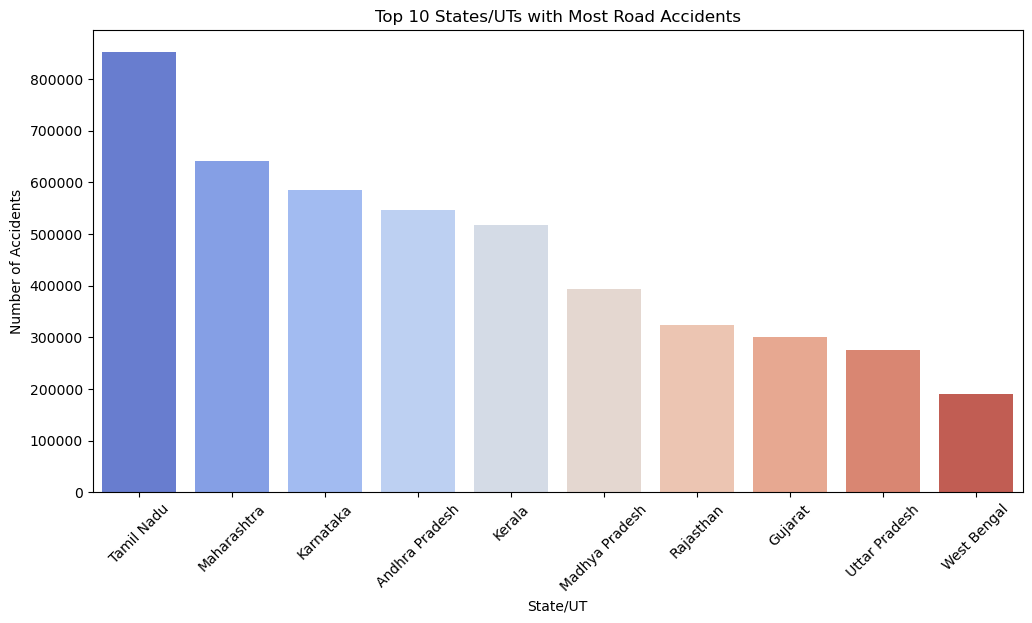

In [9]:
# Group by 'STATE/UT' and sum the 'Total' accidents
top_states = df.groupby('STATE/UT')['Total'].sum().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 States/UTs with Most Road Accidents")
plt.xlabel("State/UT")
plt.ylabel("Number of Accidents")
plt.show()
# this wll show the state with most road accidents

C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


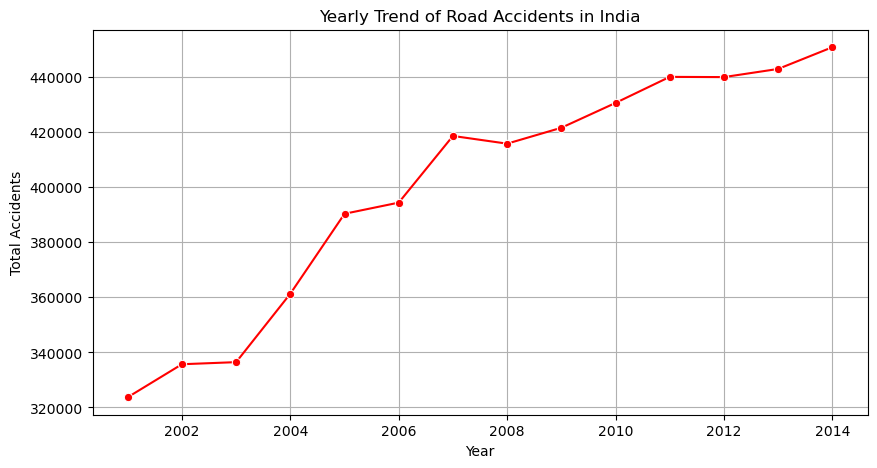

In [10]:
# Group by 'YEAR' and sum the 'Total' accidents
yearly_accidents = df.groupby('YEAR')['Total'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker="o", color="red")
plt.title("Yearly Trend of Road Accidents in India")
plt.xlabel("Year")
plt.ylabel("Total Accidents")
plt.grid()
plt.show()
# this will show whether the accidents in the respective states have increased or decreased

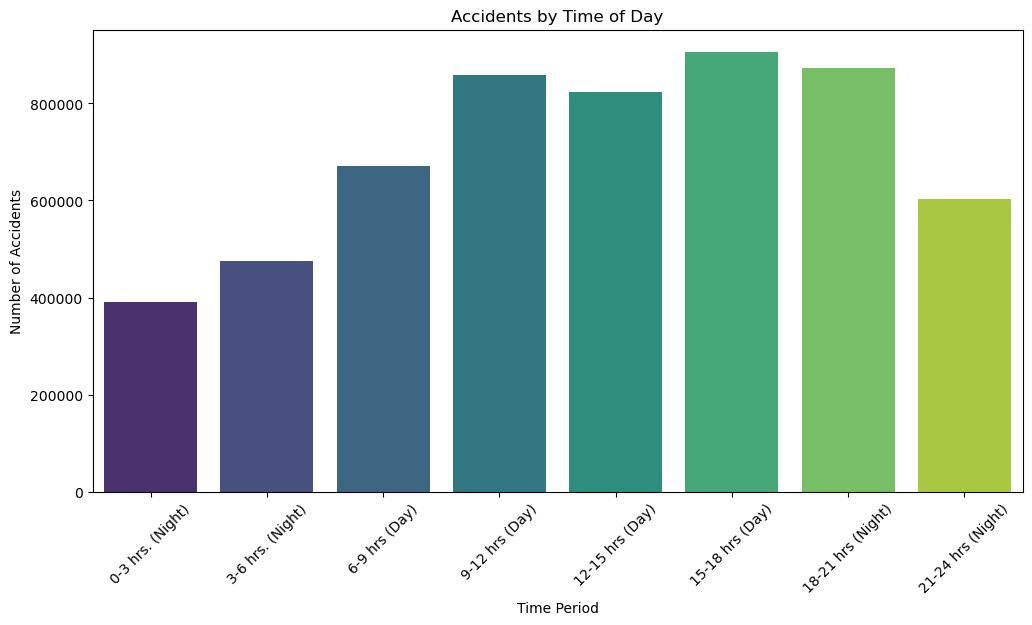

In [11]:
# Summing up accidents based on time periods
time_periods = [
    '0-3 hrs. (Night)', '3-6 hrs. (Night)', '6-9 hrs (Day)', 
    '9-12 hrs (Day)', '12-15 hrs (Day)', '15-18 hrs (Day)', 
    '18-21 hrs (Night)', '21-24 hrs (Night)'
]

time_accidents = df[time_periods].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=time_accidents.index, y=time_accidents.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Accidents by Time of Day")
plt.xlabel("Time Period")
plt.ylabel("Number of Accidents")
plt.show()
# this is for showig in which hour the most road accidents have occured

C:\Users\deepa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


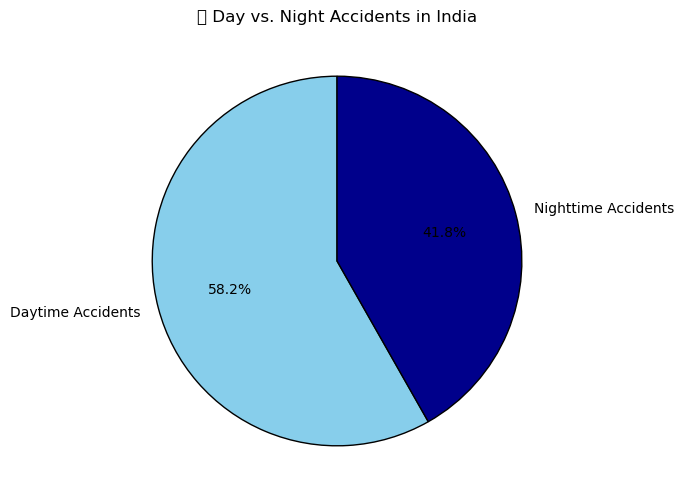

In [12]:
# Defining day and night time periods
day_periods = ['6-9 hrs (Day)', '9-12 hrs (Day)', '12-15 hrs (Day)', '15-18 hrs (Day)']
night_periods = ['0-3 hrs. (Night)', '3-6 hrs. (Night)', '18-21 hrs (Night)', '21-24 hrs (Night)']

# Sum up accidents for day and night
day_accidents = df[day_periods].sum().sum()
night_accidents = df[night_periods].sum().sum()

# Ploting the Pie Chart
plt.figure(figsize=(6,6))
plt.pie([day_accidents, night_accidents], labels=['Daytime Accidents', 'Nighttime Accidents'], 
        autopct='%1.1f%%', colors=['skyblue', 'darkblue'], startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("🚗 Day vs. Night Accidents in India")
plt.show()
# this will show us a visulation on whether most accidents have occured a=at day or night

SUMMARY OF THE DATASET

Key Findings from the Analysis

1️⃣ Day vs. Night Accidents

Our analysis revealed whether accidents are more frequent during the day or at night.

The pie chart clearly showed the distribution, helping identify riskier driving hours.

2️⃣ States with Highest Night Accident Percentage

We identified the top 10 states where night-time driving is more dangerous.

This can help in improving road safety measures (better street lighting, stricter night patrols).